In [91]:
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline

In [92]:
df = pd.read_csv('/content/telecom_customer_churn.csv')

In [93]:
df.shape

(7043, 38)

In [94]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [95]:
df.head()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [96]:
df.size

267634

In [97]:
df.dtypes

,0
Customer ID,object
Gender,object
Age,int64
Married,object
Number of Dependents,int64
City,object
Zip Code,int64
Latitude,float64
Longitude,float64
Number of Referrals,int64


In [98]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [99]:
df['Unlimited Data']

,Unlimited Data
0,Yes
1,No
2,Yes
3,Yes
4,Yes
...,...
7038,Yes
7039,Yes
7040,Yes
7041,Yes


In [100]:
number_columns=['Age','Number of Dependents','Number of Referrals','Tenure in Months','Avg Monthly Long Distance Charges','Avg Monthly GB Download','Monthly Charge','Total Charges','Total Extra Data Charges','Total Long Distance Charges','Total Revenue']

In [101]:
def unique_values_names(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [102]:
unique_values_names(df)

Customer ID:['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Gender:['Female' 'Male']
Married:['Yes' 'No']
City:['Frazier Park' 'Glendale' 'Costa Mesa' ... 'Jacumba' 'Carpinteria'
 'Meadow Valley']
Offer:[nan 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service:['Yes' 'No']
Multiple Lines:['No' 'Yes' nan]
Internet Service:['Yes' 'No']
Internet Type:['Cable' 'Fiber Optic' 'DSL' nan]
Online Security:['No' 'Yes' nan]
Online Backup:['Yes' 'No' nan]
Device Protection Plan:['No' 'Yes' nan]
Premium Tech Support:['Yes' 'No' nan]
Streaming TV:['Yes' 'No' nan]
Streaming Movies:['No' 'Yes' nan]
Streaming Music:['No' 'Yes' nan]
Unlimited Data:['Yes' 'No' nan]
Contract:['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing:['Yes' 'No']
Payment Method:['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status:['Stayed' 'Churned' 'Joined']
Churn Category:[nan 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']
Churn Reason:[nan 'Competi

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [104]:
features = df.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')


Customer ID--->7043
Gender--->2
Age--->62
Married--->2
Number of Dependents--->10
City--->1106
Zip Code--->1626
Latitude--->1626
Longitude--->1625
Number of Referrals--->12
Tenure in Months--->72
Offer--->5
Phone Service--->2
Avg Monthly Long Distance Charges--->3583
Multiple Lines--->2
Internet Service--->2
Internet Type--->3
Avg Monthly GB Download--->49
Online Security--->2
Online Backup--->2
Device Protection Plan--->2
Premium Tech Support--->2
Streaming TV--->2
Streaming Movies--->2
Streaming Music--->2
Unlimited Data--->2
Contract--->3
Paperless Billing--->2
Payment Method--->3
Monthly Charge--->1591
Total Charges--->6540
Total Refunds--->500
Total Extra Data Charges--->16
Total Long Distance Charges--->6068
Total Revenue--->6975
Customer Status--->3
Churn Category--->5
Churn Reason--->20


In [105]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [106]:
df.duplicated().sum()

0

In [107]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [108]:
df.skew(numeric_only= True)

,0
Age,0.162186
Number of Dependents,2.109932
Zip Code,-0.209615
Latitude,0.314804
Longitude,-0.091932
Number of Referrals,1.446060
Tenure in Months,0.240543
Avg Monthly Long Distance Charges,-0.001971
Avg Monthly GB Download,1.184056
Monthly Charge,-0.275394


In [109]:
df.corr(numeric_only= True)

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Age,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.025141,0.009927,-0.020010,-0.566518,0.134511,0.059684,0.024168,0.025036,0.003065,0.048265
Number of Dependents,-0.119000,1.000000,0.016493,0.029081,-0.024271,0.278003,0.108237,-0.002898,0.300802,-0.125649,0.022535,0.014023,-0.014436,0.068966,0.038038
Zip Code,-0.008183,0.016493,1.000000,0.894769,-0.790564,0.001463,0.007146,0.012298,-0.002859,-0.002517,0.001978,-0.003797,-0.014550,0.005063,0.002944
Latitude,-0.010305,0.029081,0.894769,1.000000,-0.885979,0.018715,0.011963,0.014450,-0.013485,-0.021613,-0.002784,-0.009901,-0.013233,0.008029,0.000082
Longitude,0.007612,-0.024271,-0.790564,-0.885979,1.000000,-0.009893,-0.009672,-0.015420,0.015195,0.021052,0.003811,-0.000597,0.010461,-0.006923,0.001062
Number of Referrals,-0.025141,0.278003,0.001463,0.018715,-0.009893,1.000000,0.326975,0.001800,0.080243,0.026301,0.250378,0.024756,0.000350,0.216190,0.261853
Tenure in Months,0.009927,0.108237,0.007146,0.011963,-0.009672,0.326975,1.000000,0.012713,0.038173,0.239065,0.826074,0.059021,0.082266,0.674149,0.853146
Avg Monthly Long Distance Charges,-0.020010,-0.002898,0.012298,0.014450,-0.015420,0.001800,0.012713,1.000000,0.019047,0.019149,0.016946,-0.026072,0.021162,0.548759,0.173072
Avg Monthly GB Download,-0.566518,0.300802,-0.002859,-0.013485,0.015195,0.080243,0.038173,0.019047,1.000000,-0.017283,0.031957,-0.011000,0.015451,0.024101,0.031922
Monthly Charge,0.134511,-0.125649,-0.002517,-0.021613,0.021052,0.026301,0.239065,0.019149,-0.017283,1.000000,0.622810,0.023963,0.121238,0.235685,0.563249


In [110]:
df.drop(['Customer ID','Total Refunds','Zip Code','Latitude', 'Longitude','Churn Category', 'Churn Reason'],axis='columns',inplace=True)




In [111]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [112]:
df=df.interpolate()

<ipython-input-112-4284aa25ba53>:1: FutureWarning:

DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



In [113]:
import plotly.express as px

In [114]:
fig = px.histogram(df, x = 'Age')
fig.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Number of Referrals'}>],
       [<Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>,
        <Axes: title={'center': 'Avg Monthly GB Download'}>],
       [<Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Extra Data Charges'}>],
       [<Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >]],
      dtype=object)

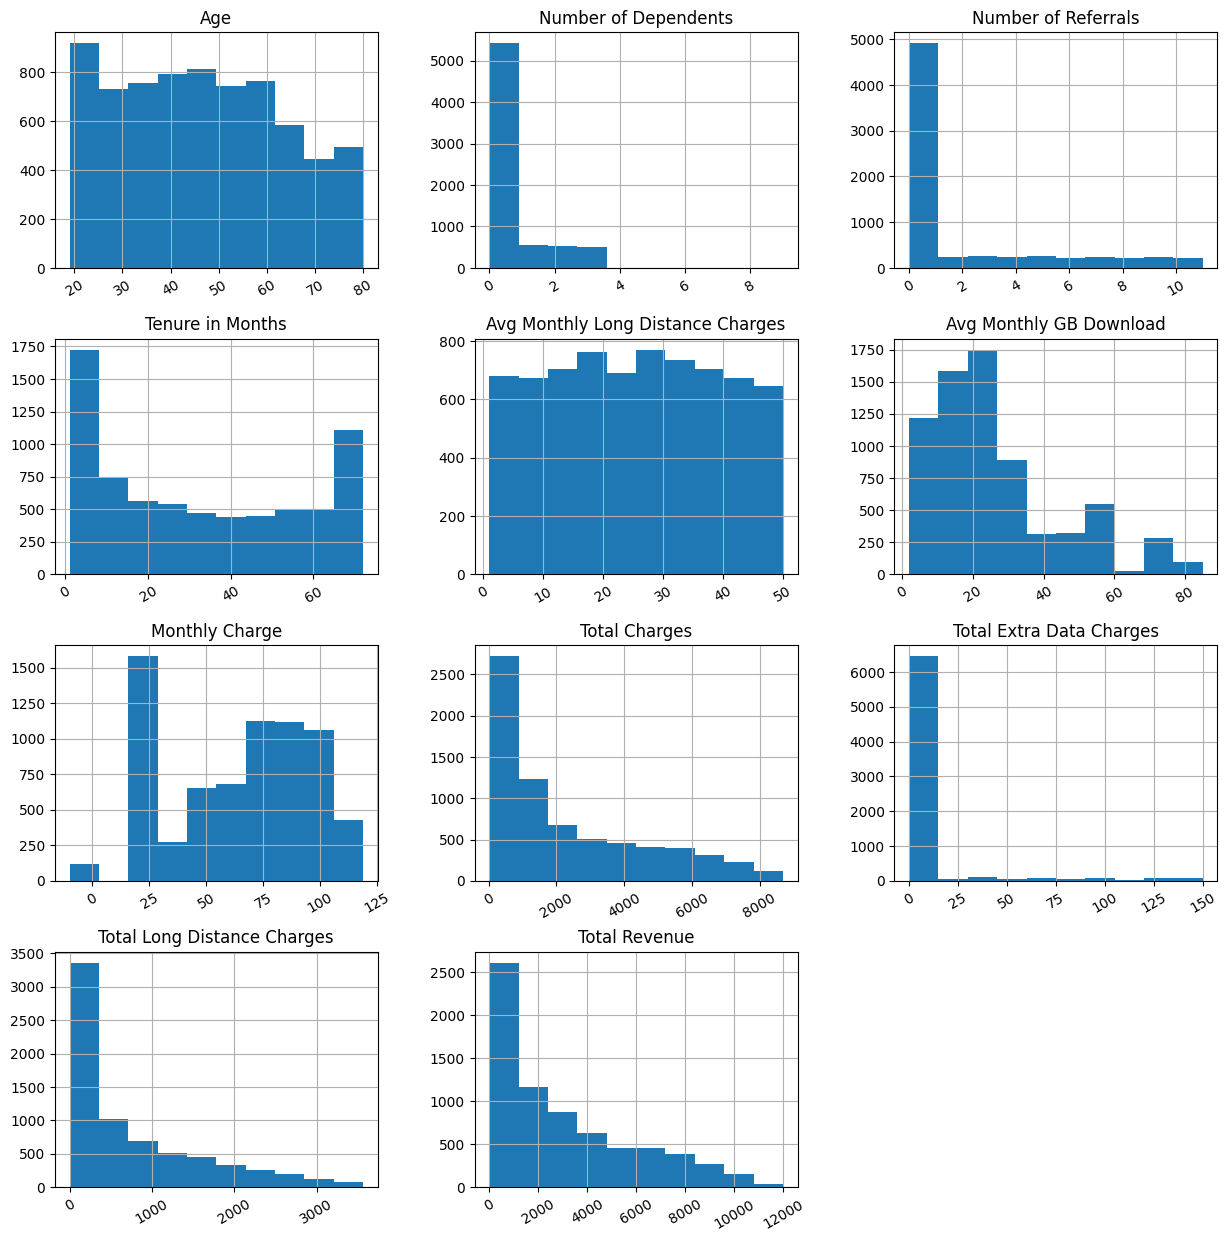

In [115]:
df.hist(figsize=(15,15), xrot=30)

In [116]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [117]:
df.skew(numeric_only= True)

,0
Age,0.162186
Number of Dependents,2.109932
Number of Referrals,1.446060
Tenure in Months,0.240543
Avg Monthly Long Distance Charges,0.003982
Avg Monthly GB Download,1.174671
Monthly Charge,-0.275394
Total Charges,0.963791
Total Extra Data Charges,4.091209
Total Long Distance Charges,1.238282


In [118]:
df.corr(numeric_only= True)

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
Age,1.000000,-0.119000,-0.025141,0.009927,-0.016885,-0.485591,0.134511,0.059684,0.025036,0.003065,0.048265
Number of Dependents,-0.119000,1.000000,0.278003,0.108237,-0.004210,0.244664,-0.125649,0.022535,-0.014436,0.068966,0.038038
Number of Referrals,-0.025141,0.278003,1.000000,0.326975,0.001038,0.058163,0.026301,0.250378,0.000350,0.216190,0.261853
Tenure in Months,0.009927,0.108237,0.326975,1.000000,0.010324,0.036631,0.239065,0.826074,0.082266,0.674149,0.853146
Avg Monthly Long Distance Charges,-0.016885,-0.004210,0.001038,0.010324,1.000000,0.016966,0.019610,0.015355,0.016615,0.512324,0.163751
Avg Monthly GB Download,-0.485591,0.244664,0.058163,0.036631,0.016966,1.000000,-0.016296,0.025859,0.013258,0.027531,0.028748
Monthly Charge,0.134511,-0.125649,0.026301,0.239065,0.019610,-0.016296,1.000000,0.622810,0.121238,0.235685,0.563249
Total Charges,0.059684,0.022535,0.250378,0.826074,0.015355,0.025859,0.622810,1.000000,0.121859,0.610185,0.972212
Total Extra Data Charges,0.025036,-0.014436,0.000350,0.082266,0.016615,0.013258,0.121238,0.121859,1.000000,0.058871,0.122496
Total Long Distance Charges,0.003065,0.068966,0.216190,0.674149,0.512324,0.027531,0.235685,0.610185,0.058871,1.000000,0.778559


In [119]:
df['Age']

,Age
0,37
1,46
2,50
3,78
4,75
...,...
7038,20
7039,40
7040,22
7041,21


In [120]:
import matplotlib.pyplot as plt

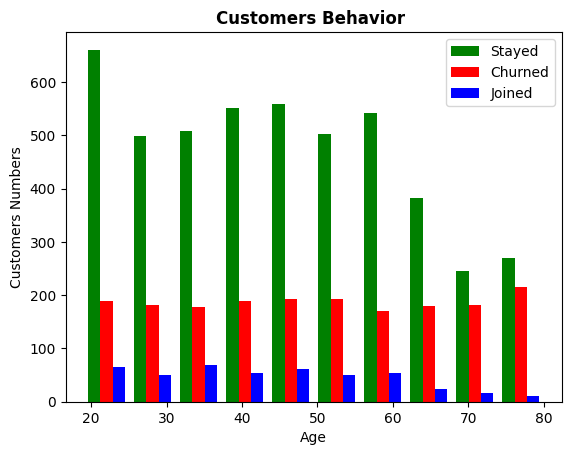

In [121]:
Customer_Stayed=df[df['Customer Status']=='Stayed'].Age
Customer_Churned=df[df['Customer Status']=='Churned'].Age
Customer_Joined=df[df['Customer Status']=='Joined'].Age

plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_Stayed,Customer_Churned,Customer_Joined], color=['green','red','blue'],label=['Stayed','Churned','Joined'])

plt.title('Customers Behavior ',fontweight ="bold")
plt.legend()

In [122]:
import seaborn as sns

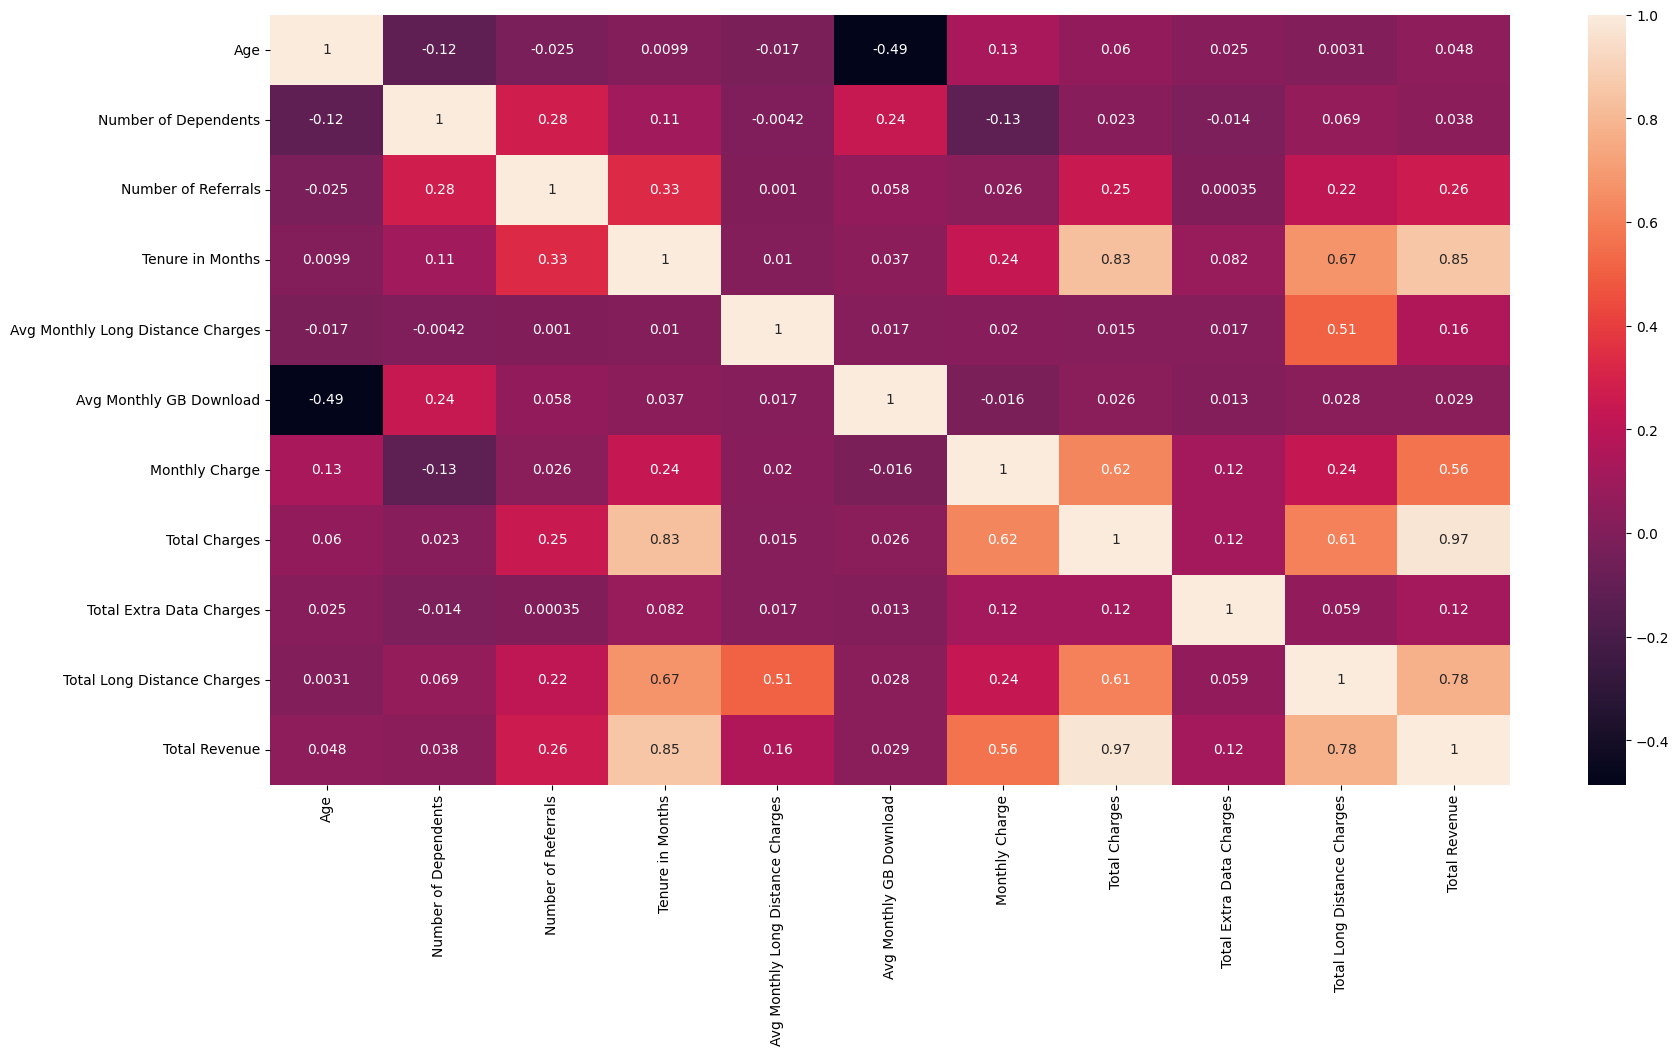

In [123]:
df = df.infer_objects()
numeric_df = df.select_dtypes(include=[float, int])
data  = numeric_df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data, annot = True)
plt.show()

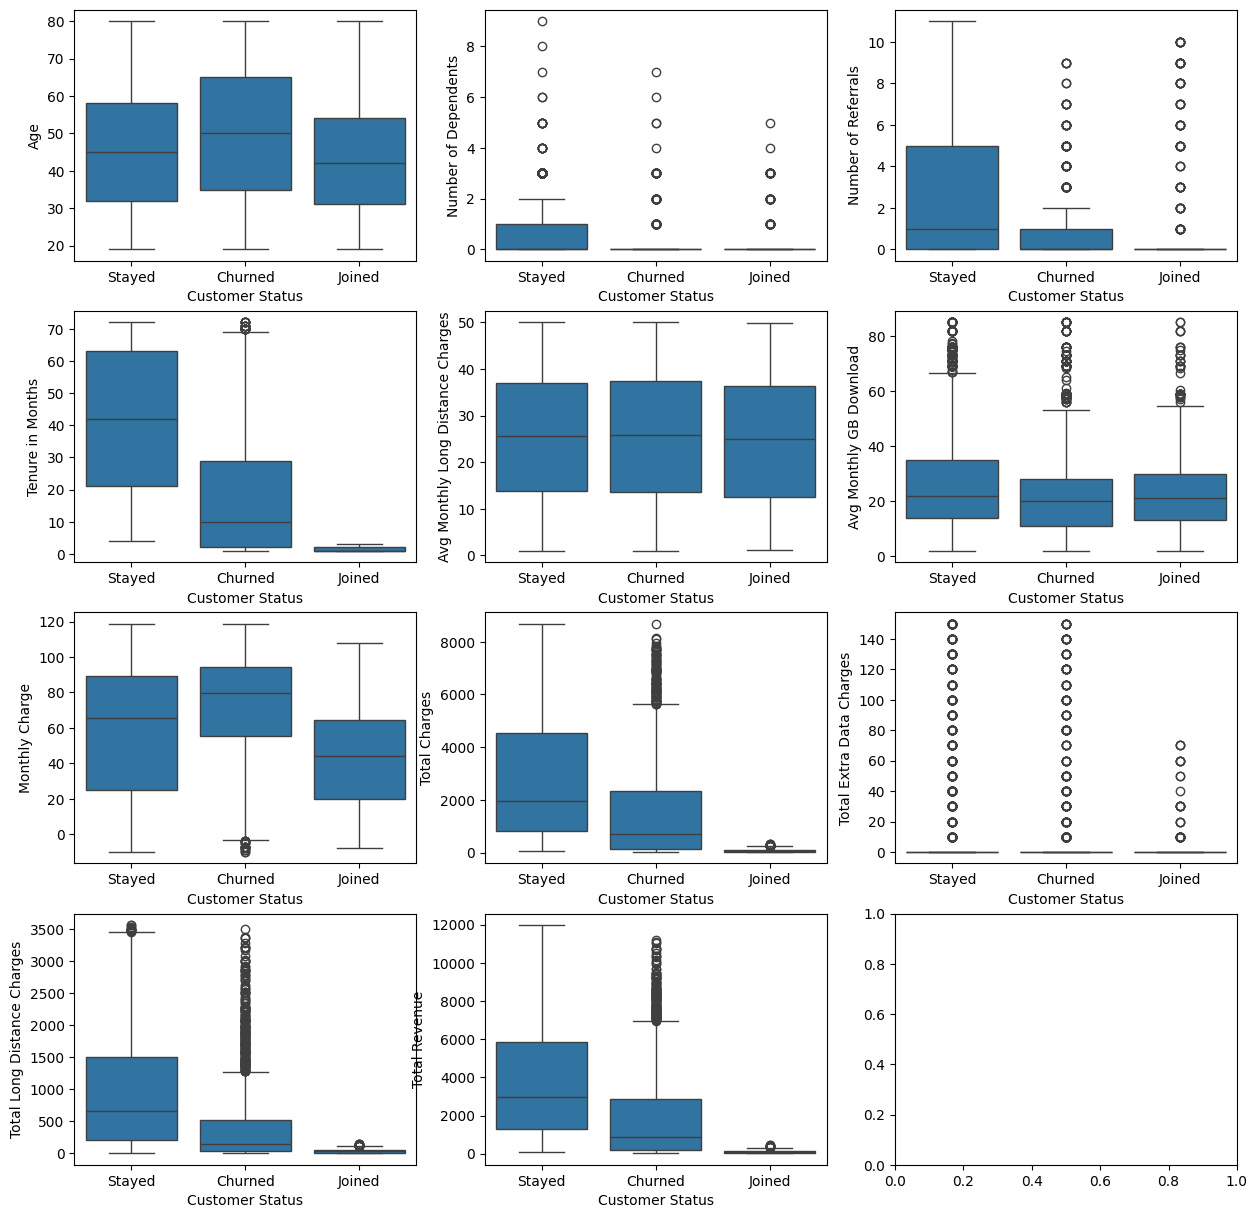

In [124]:
fig, ax = plt.subplots(4,3, figsize = (15,15))
for i, subplot in zip(number_columns, ax.flatten()):
    sns.boxplot(x = 'Customer Status', y = i , data = df, ax = subplot)

In [125]:
fig = px.density_heatmap(df, x='Age', y='Total Charges')
fig.show()

<Axes: xlabel='Customer Status'>

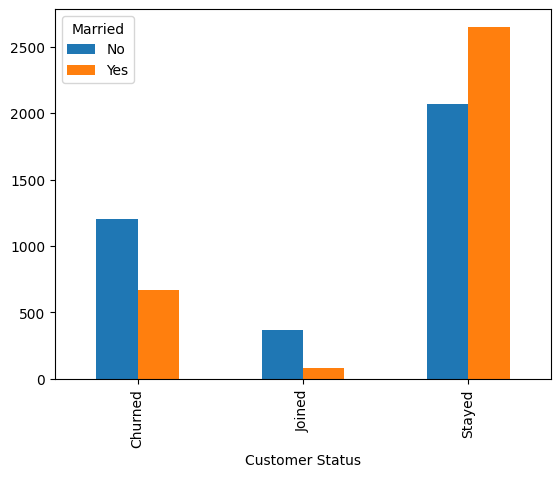

In [126]:
pd.crosstab(df['Customer Status'], df['Married']).plot(kind='bar')

<Axes: xlabel='Customer Status'>

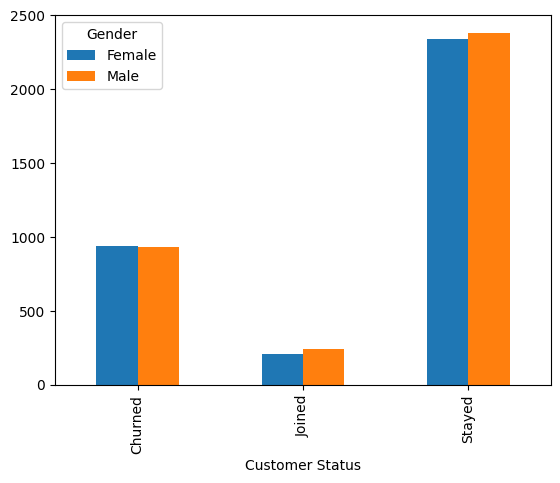

In [127]:
pd.crosstab(df['Customer Status'], df['Gender']).plot(kind='bar')

In [128]:
df['Payment Method'].unique()

array(['Credit Card', 'Bank Withdrawal', 'Mailed Check'], dtype=object)

In [142]:
Roles = {}
for j in df['Payment Method'].unique():
    Roles[j] = df[df['Payment Method'] == j]

In [143]:
Roles.keys()

dict_keys(['Credit Card', 'Bank Withdrawal', 'Mailed Check'])

In [141]:
Roles['Credit Card']

,Gender,Age,Married,Number of Dependents,City,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,Frazier Park,2,9,NaN,1,42.39,...,1.0,One Year,1,Credit Card,65.60,593.30,0,381.51,974.81,Stayed
1,1,46,0,0,Glendale,0,9,NaN,1,10.69,...,0.0,Month-to-Month,0,Credit Card,-4.00,542.40,10,96.21,610.28,Stayed
4,0,75,1,0,Camarillo,3,3,NaN,1,7.38,...,1.0,Month-to-Month,1,Credit Card,83.90,267.40,0,22.14,289.54,Churned
5,0,23,0,3,Midpines,0,9,Offer E,1,16.77,...,1.0,Month-to-Month,1,Credit Card,69.40,571.45,0,150.93,722.38,Stayed
7,1,52,1,0,Napa,8,63,Offer B,1,12.96,...,0.0,Two Year,1,Credit Card,84.65,5377.80,20,816.48,6214.28,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,0,20,0,0,Los Angeles,0,7,Offer E,1,36.49,...,1.0,One Year,1,Credit Card,94.05,633.45,0,255.43,888.88,Stayed
7036,0,53,0,0,Hume,0,1,Offer E,1,42.09,...,1.0,Month-to-Month,1,Credit Card,70.15,70.15,0,42.09,112.24,Churned
7038,0,20,0,0,La Mesa,0,13,Offer D,1,46.68,...,1.0,One Year,0,Credit Card,55.15,742.90,0,606.84,1349.74,Stayed
7040,1,22,0,0,Elk,0,2,Offer E,1,18.62,...,1.0,Month-to-Month,1,Credit Card,50.30,92.75,0,37.24,129.99,Joined


In [144]:
len(Roles)

3

In [135]:
off = df['Offer'].value_counts()
off

,count
Offer,
Offer B,824
Offer E,805
Offer D,602
Offer A,520
Offer C,415


In [136]:
fig = go.Figure([go.Bar(x=off.index, y=off.values)])
fig.show()

In [145]:
df_off = Roles['Credit Card'].Offer.value_counts()
df_off

,count
Offer,
Offer B,312
Offer E,267
Offer D,251
Offer A,239
Offer C,164


In [147]:
fig = go.Figure([go.Bar(x= df_off.index, y=df_off.values)])
fig.show()

In [148]:
df = df.rename(columns = {'Customer Status':'Customer_Status'})

In [149]:
Roles1 = {}
for k in df['Customer_Status'].unique():
    Roles1[k] = df[df['Customer_Status'] == k]
    Roles1.keys()

In [150]:
df_state = Roles1['Stayed'].Offer.value_counts()
df_state

,count
Offer,
Offer B,723
Offer A,485
Offer D,441
Offer C,320
Offer E,204
